[0.00802112 0.02750977 0.02123429 0.01734325 0.01085417 0.01479796
 0.01491467 0.00274437 0.0146867  0.0089542  0.01970599 0.02263478
 0.02888992 0.00809829 0.01268474 0.00115718 0.01407262 0.00862065
 0.01936065 0.00772404 0.01311367 0.00661765 0.00220088 0.0123162
 0.01479873 0.01434688 0.00694062 0.03700824 0.02072114 0.01947682
 0.00882149 0.0095503  0.00846251 0.00509607 0.00873137 0.03062223
 0.01149124 0.02608434 0.02088475 0.01092508 0.01249561 0.01830645
 0.03447733 0.03414753 0.0149555  0.00925218 0.01902153 0.03338923
 0.02241298 0.01156163 0.01508793 0.0139073  0.01886494 0.0149891
 0.0173721  0.01021706 0.01248532 0.01305646 0.01540605 0.01146481
 0.00621273 0.04925944 0.01043569 0.00900159]
V1: 0.008021117611897562
V2: 0.027509766140801414
V3: 0.021234289653871054
V4: 0.017343248993330652
V5: 0.010854166134762484
V6: 0.014797962573225567
V7: 0.014914672971302376
V8: 0.00274436516712786
V9: 0.014686701314463656
V10: 0.008954196514573742
V11: 0.019705991068872088
V12: 0.022

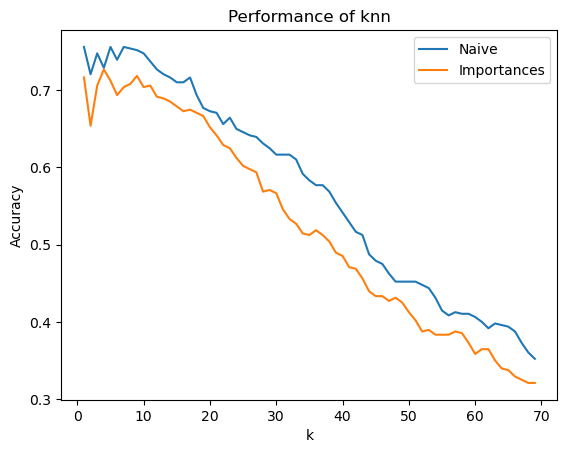

In [8]:
import numpy as np
import openml
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

def weightedEuclidean(point, data):
    weighted_point = point * importances
    weighted_data = data * importances
    return np.sqrt(np.sum((weighted_point - weighted_data)**2, axis=1))

class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric    
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train    
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])        
        return list(map(most_common, neighbors))    
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
    
data = fetch_openml(data_id=1491, parser='auto')
X = data['data']
y = data['target']  # Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # Preprocess data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
#print(y_train_encoded, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train_encoded)
importances = rf.feature_importances_
print(importances)
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")
    
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)  # Test knn model across varying ks
#print(X_train)
accuracies = []
Fknnaccuracies = []
ks = range(1, 70)
for k in ks:
    print("Calculating k=", k)
    knn = KNeighborsClassifier(k=k)
    Fknn = KNeighborsClassifier(k=k, dist_metric=weightedEuclidean)
    knn.fit(X_train, y_train)
    Fknn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    Fknnaccuracy = Fknn.evaluate(X_test, y_test)
    accuracies.append(accuracy)  # Visualize accuracy vs. k
    Fknnaccuracies.append(Fknnaccuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies, label='Naive')
ax.plot(ks, Fknnaccuracies, label='Importances')
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.legend()
plt.show()